In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import glob
from imutils.object_detection import non_max_suppression



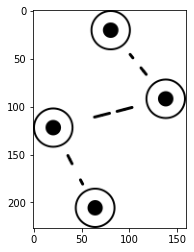

In [2]:
img = cv2.imread("punchline.png")
plt.imshow(img)


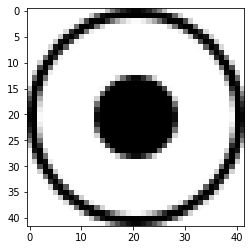

In [3]:
template = cv2.imread("template.png")
plt.imshow(template)
(tH, tW) = template.shape[:2]
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
print(cv2.TM_CCOEFF)


4


[INFO] 11 matched locations *before* NMS
No of Templates Matched =  11


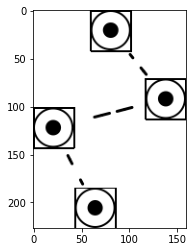

In [5]:

result = cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)
(yCoords, xCoords) = np.where(result >= 0.8)
number_of_templates_matched = 0
clone = img.copy()
print("[INFO] {} matched locations *before* NMS".format(len(yCoords)))
for (x, y) in zip(xCoords, yCoords):
    	# draw the bounding box on the image
	cv2.rectangle(clone, (x, y), (x + tW, y + tH),
		(0), 1)
	number_of_templates_matched = number_of_templates_matched + 1

print("No of template matched locations",number_of_templates_matched)
plt.imshow(clone,cmap="gray")


[INFO] 4 matched locations *after* NMS


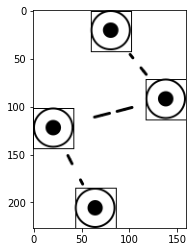

In [6]:
rects = []
# loop over the starting (x, y)-coordinates again
for (x, y) in zip(xCoords, yCoords):
	# update our list of rectangles
	rects.append((x, y, x + tW, y + tH))
# apply non-maxima suppression to the rectangles
pick = non_max_suppression(np.array(rects))
print("[INFO] {} matched locations *after* NMS".format(len(pick)))
# loop over the final bounding boxes
for (startX, startY, endX, endY) in pick:
	# draw the bounding box on the image
	cv2.rectangle(img, (startX, startY), (endX, endY),
		(0), 1)
# show the output image
plt.imshow(img,cmap="gray")